# Importiere Daten


In [1]:
import numpy as np
import pandas as pd
#import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import os as os

## Funktionen definieren

# Gewichtung

In [2]:
def weighting_arr(arr):
    lat = arr['lat']
    element_temp = ~np.isnan(arr.isel(time=0))
    ones_array = xr.ones_like(element_temp, dtype = float)
    cos_array_temp = ones_array * np.cos(np.radians(lat[:]))
    cos_array = cos_array_temp.where(element_temp)
    return cos_array

def weighting(arr, lat_min, lat_max, lon_min, lon_max):
    weight_arr = weighting_arr(arr).sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))
    temp =arr.sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))*weight_arr
    return temp.sum(dim= ['lat', 'lon'])/weight_arr.sum()

In [3]:
month_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

legend_colors = plt.cm.tab20(range(12))

In [4]:
custom_rc_params_small = {
    'figure.figsize': (8.5, 5),  # Width x Height in centimeters
    'font.size': 12,  # Font size
    # You can add more custom parameters here if needed
}

plt.rcParams.update(custom_rc_params_small)

## Daten importieren

In [5]:
# TMin_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
# TMax_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'
TAvg_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.tmp.dat.nc/cru_ts4.07.1901.2022.tmp.dat.nc'
DTR_file = 'C:/Users/leonh/Desktop/Praktikum_AWI/data/cru_ts4.07.1901.2022.dtr.dat.nc/cru_ts4.07.1901.2022.dtr.dat.nc'




# TMin = xr.open_dataset(TMin_file)
# TMax = xr.open_dataset(TMax_file)
TAvg = xr.open_dataset(TAvg_file)
DTR = xr.open_dataset(DTR_file)

## Differenz berechnen

In [6]:
# def weighting_arr(arr):
#     lat = arr['lat']
#     element_temp = ~np.isnan(arr.isel(time=0))
#     ones_array = xr.ones_like(element_temp, dtype = float)
#     cos_array_temp = ones_array * np.cos(np.radians(lat[:]))
#     cos_array = cos_array_temp.where(element_temp)
#     return cos_array

# def weighting(arr, lat_min, lat_max, lon_min, lon_max):
#     weight_arr = weighting_arr(arr).sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))
#     temp =arr.sel(lat = slice(lat_min, lat_max), lon = slice(lon_min, lon_max))*weight_arr
#     return temp.sum(dim= ['lat', 'lon'])/weight_arr.sum()


In [7]:
# DTR_average = weighting(DTR.dtr, -90, 90, -180, 180)
# DTR_mean_year = DTR_average.resample(time = 'Y').mean()
# DTR_mean_year

In [8]:
TAvg_year = TAvg.tmp.resample(time = 'Y').mean()
TAvg_mean_year = weighting(TAvg_year, -90, 90, -180, 180)

In [9]:
DTR_year = DTR.dtr.resample(time = 'Y').mean()
DTR_mean_year = weighting(DTR_year, -90, 90, -180, 180)

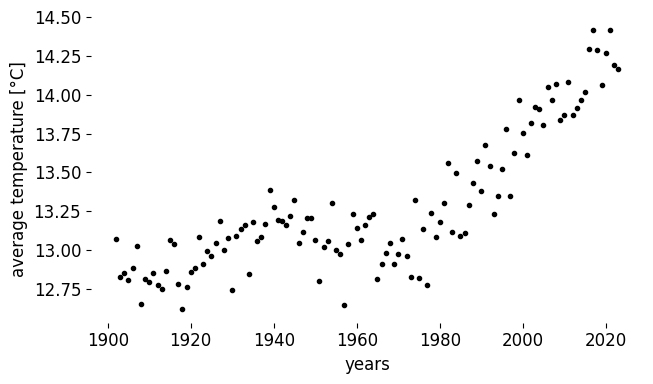

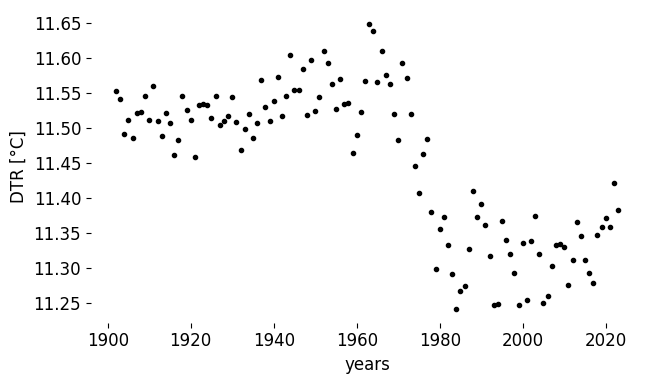

In [10]:
startdate = '1901'

TAvg_mean_year_after_1970 = TAvg_mean_year.sel(time=TAvg_mean_year['time'] >= pd.to_datetime(startdate))

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(17 / 2.54, 4))

# Plot the data for the first plot
ax1.plot(TAvg_mean_year_after_1970.time, TAvg_mean_year_after_1970, marker='.', linestyle='', color='black', label='Average Temperature')
ax1.set_xlabel('years')
ax1.set_ylabel('average temperature [°C]', color='black')

# Set the x-axis limit for the first plot
#ax1.set_xlim(pd.to_datetime('1970',))

# Remove the top and right spines for the first plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Add a legend to the first plot
lines1, labels1 = ax1.get_legend_handles_labels()
#ax1.legend(lines1, labels1, loc='best')

# Show the first plot
plt.tight_layout()
plt.savefig('CRU_data_TAvg_yearly_global_'+str(startdate)+ '.pdf')
plt.savefig('CRU_data_TAvg_yearly_global_'+str(startdate)+ '.png',dpi = 300)
plt.show()


DTR_mean_year_after_1970 = DTR_mean_year.sel(time=DTR_mean_year['time'] >= pd.to_datetime(startdate))
# Create the second plot
fig2, ax2 = plt.subplots(figsize=(17 / 2.54, 4))

# Plot the data for the second plot
ax2.plot(DTR_mean_year_after_1970.time, DTR_mean_year_after_1970, marker='.', linestyle='', color='black', label='DTR')
ax2.set_xlabel('years')
ax2.set_ylabel('DTR [°C]')

# Set the x-axis limit for the second plot
#ax2.set_xlim(pd.to_datetime('1970',))

# Set the y-axis limits for the second plot
#ax2.set_ylim(7.15, 7.6)

# Remove the top and right spines for the second plot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add a legend to the second plot
lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines2, labels2, loc='best')

# Show the second plot
plt.tight_layout()
plt.savefig('CRU_data_DTR_yearly_global_'+str(startdate)+ '.pdf')
plt.savefig('CRU_data_DTR_yearly_global_'+str(startdate)+ '.png',dpi = 300)
plt.show()

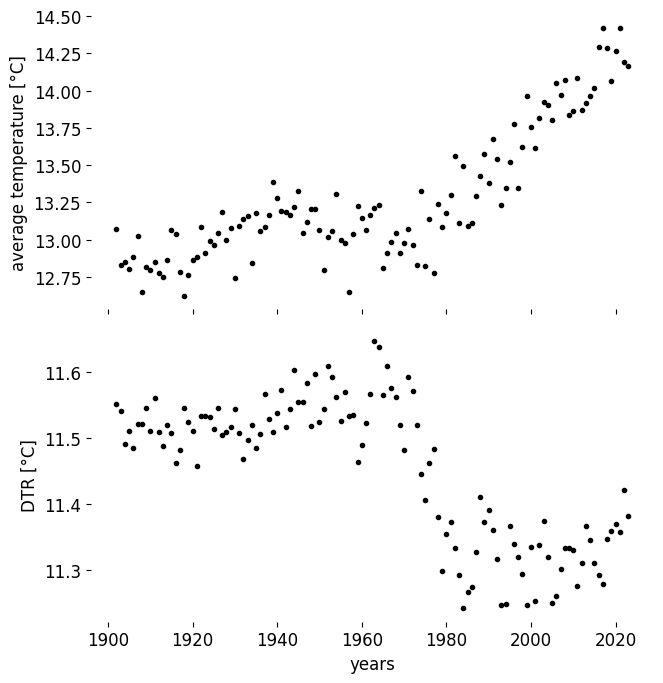

In [11]:

# Filter data for the first plot
TAvg_mean_year_after_1970 = TAvg_mean_year.sel(time=TAvg_mean_year['time'] >= pd.to_datetime(startdate))

# Filter data for the second plot
DTR_mean_year_after_1970 = DTR_mean_year.sel(time=DTR_mean_year['time'] >= pd.to_datetime(startdate))

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17 / 2.54, 7))

# Plot the data for the first subplot
ax1.plot(TAvg_mean_year_after_1970.time, TAvg_mean_year_after_1970, marker='.', linestyle='', color='black', label='Average Temperature')
ax1.set_ylabel('average temperature [°C]')
ax1.set_xticklabels([])  # Remove x-axis labels for the first subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Plot the data for the second subplot
ax2.plot(DTR_mean_year_after_1970.time, DTR_mean_year_after_1970, marker='.', linestyle='', color='black', label='DTR')
ax2.set_xlabel('years')
ax2.set_ylabel('DTR [°C]')
#ax2.set_ylim(7.15, 7.45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save or show the plot
plt.savefig('combined_plot_yearly'+str(startdate)+'nomarker_global.pdf')
plt.savefig('combined_plot_yearly'+str(startdate)+'nomarker_global.png', dpi=300)
plt.show()


In [12]:
DTR_fluctuations = DTR.dtr - DTR.dtr.sel(time = slice(pd.to_datetime('1940'),pd.to_datetime('1990'))).mean(dim = ['time'])

In [13]:
DTR_fluctuations

<xarray.DataArray 'dtr' (time: 1464, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2022-12-16

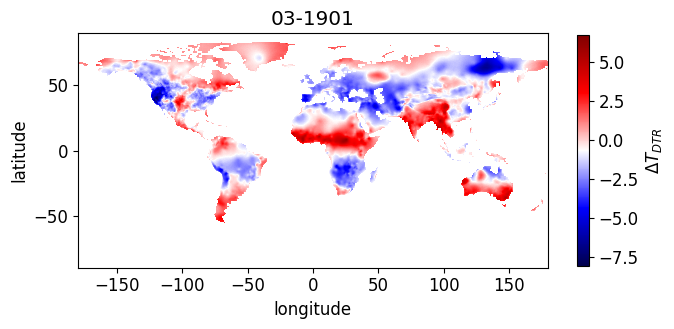

In [14]:

# Set up the figure
fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
x_coords = DTR_fluctuations.coords['lon'].values
y_coords = DTR_fluctuations.coords['lat'].values
heatmap = ax.imshow(DTR_fluctuations.sel(time=DTR_fluctuations.time[0]), cmap='seismic', origin='lower',
                    extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
cbar = plt.colorbar(heatmap, shrink=0.45, label='$\Delta T_{DTR}$')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title(pd.to_datetime('1901-03-23').strftime('%m-%Y'))

plt.tight_layout()

MovieWriter imagemagick unavailable; using Pillow instead.


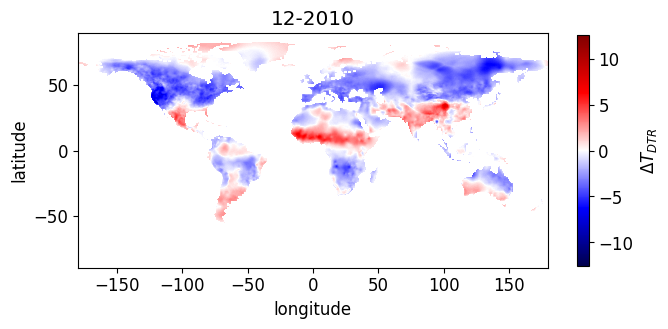

In [15]:
from matplotlib.animation import FuncAnimation

boundary  = np.max([DTR_fluctuations.max(), np.abs(DTR_fluctuations.min())])


# Set up the figure
fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
x_coords = DTR_fluctuations.coords['lon'].values
y_coords = DTR_fluctuations.coords['lat'].values
heatmap = ax.imshow(DTR_fluctuations.sel(time=DTR_fluctuations.time[0]), cmap='seismic', origin='lower',
                    vmin= -boundary, vmax= boundary, 
                    extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
cbar = plt.colorbar(heatmap, shrink=0.45, label='$\Delta T_{DTR}$')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.tight_layout()


def update(frame):
    date = DTR_fluctuations.time[frame].values
    data = DTR_fluctuations.sel(time=date)
    data_2d = data.values.reshape(len(y_coords), len(x_coords))
    heatmap.set_array(data_2d)
    ax.set_title(pd.to_datetime(date).strftime('%m-%Y'))
    return heatmap

# Number of frames (years)
num_frames = 110*12

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=80, repeat=False)

# Save the animation as a GIF (you can adjust the filename and writer as needed)
animation.save('DeltaDTR_animation.gif', writer='imagemagick')

# Show the animation
plt.show()

In [16]:
from matplotlib.animation import FuncAnimation

DTR_fluctuations_timeframe = DTR_fluctuations.sel(time = slice(pd.to_datetime('1960'), pd.to_datetime('2000')))


MovieWriter imagemagick unavailable; using Pillow instead.


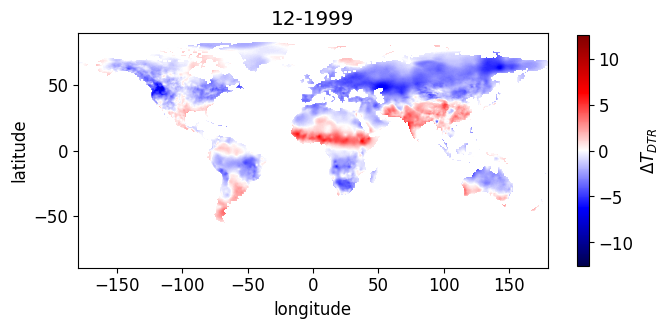

In [17]:

boundary  = np.max([DTR_fluctuations_timeframe.max(), np.abs(DTR_fluctuations_timeframe.min())])

# Set up the figure
fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
x_coords = DTR_fluctuations_timeframe.coords['lon'].values
y_coords = DTR_fluctuations_timeframe.coords['lat'].values
heatmap = ax.imshow(DTR_fluctuations_timeframe.sel(time=DTR_fluctuations_timeframe.time[0]), cmap='seismic', origin='lower',
                    vmin= -boundary, vmax= boundary, extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
cbar = plt.colorbar(heatmap, shrink=0.45, label='$\Delta T_{DTR}$')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.tight_layout()


def update(frame):
    date = DTR_fluctuations_timeframe.time[frame].values
    data = DTR_fluctuations_timeframe.sel(time=date)
    data_2d = data.values.reshape(len(y_coords), len(x_coords))
    heatmap.set_array(data_2d)
    ax.set_title(pd.to_datetime(date).strftime('%m-%Y'))
    return heatmap

# Number of frames (years)
num_frames = len(DTR_fluctuations_timeframe.time)
# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=100, repeat=False)

# Save the animation as a GIF (you can adjust the filename and writer as needed)
animation.save('DeltaDTR_animation_1960_2000.gif', writer='imagemagick')

# Show the animation
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000270FFF50EA0> (for post_execute), with arguments args (),kwargs {}:


UnboundLocalError: cannot access local variable 'data_2d' where it is not associated with a value

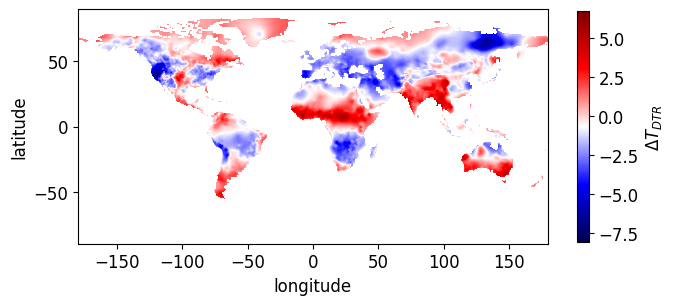

In [18]:
from matplotlib.animation import FuncAnimation

# Set up the figure
fig, ax = plt.subplots(figsize=(17/2.46, 5.5))
x_coords = DTR_fluctuations.coords['lon'].values
y_coords = DTR_fluctuations.coords['lat'].values
heatmap = ax.imshow(DTR_fluctuations.sel(time=DTR_fluctuations.time[0]), cmap='seismic', origin='lower',
                    extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
cbar = plt.colorbar(heatmap, shrink=0.45, label='$\Delta T_{DTR}$')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.tight_layout()

# Define the start and end years
start_year = 1950
end_year = 2000

def update(frame):
    # Calculate the corresponding time index
    year_index = frame + DTR_fluctuations.time.dt.year.min()
    
    # Check if the current year is within the desired range
    if start_year <= year_index <= end_year:
        date = DTR_fluctuations.time[frame].values
        data = DTR_fluctuations.sel(time=date)
        data_2d = data.values.reshape(len(y_coords), len(x_coords))
        heatmap.set_array(data_2d)
        ax.set_title(date.strftime('%m-%Y'))
    else:
        # If the current year is outside the range, set the image to an empty array
        data_2d = np.zeros_like(data_2d)
        heatmap.set_array(data_2d)
        ax.set_title('')
    
    return heatmap

# Number of frames (years)
num_frames = end_year - start_year + 1

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=80, repeat=False)

# Save the animation as a GIF (you can adjust the filename and writer as needed)
animation.save('DeltaDTR_animation.gif', writer='imagemagick')

# Show the animation
plt.show()


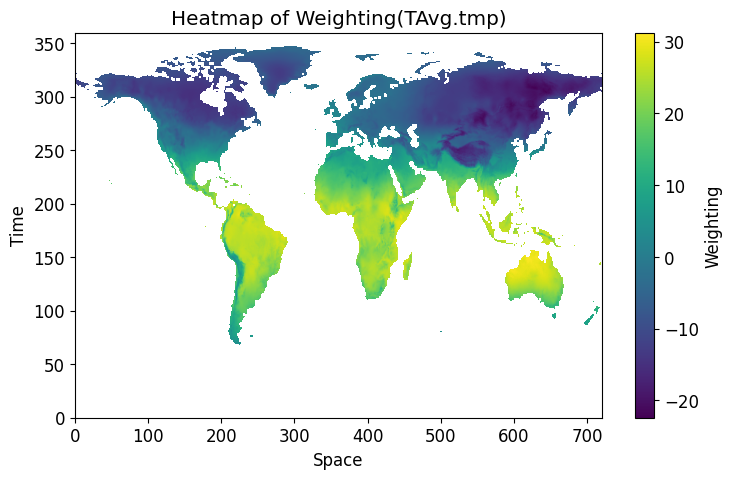

In [ ]:
plt.imshow(test, cmap='viridis', aspect='auto',origin='lower', extent=[0, test.shape[1], 0, test.shape[0]])
plt.colorbar(label='Weighting')
plt.title('Heatmap of Weighting(TAvg.tmp)')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()